In [5]:
%cd /data3/ian/dsmil-wsi
!source tsne_simsiam.sh

/data3/ian/dsmil-wsi
0 2
64
1 2
64
2 2
64
3 2
64
4 2
64
5 2
64
6 2
64
7 2
64
8 2
64
9 2
64
10 2
64
11 2
64
12 2
64
13 2
64
14 2
64
15 2
64
16 2
64
17 2
64
18 2
64
19 2
64
20 2
64
21 2
64
22 2
64
23 2
64
24 2
64
25 2
64
26 2
64
27 2
64
28 2
64
29 2
64
30 2
64
31 2
64
32 2
64
33 2
64
34 2
64
35 2
64
36 2
64
37 2
64
38 2
64
39 2
64
40 2
64
41 2
64
42 2
64
43 2
64
44 2
64
45 2
64
46 2
64
47 2
64
48 2
64
49 2
64
50 2
64
51 2
64
52 2
64
53 2
64
54 2
64
55 2
64
56 2
64
57 2
64
58 2
64
59 2
64
60 2
64
61 2
64
62 2
64
63 2
64
64 2
64
65 2
64
66 2
64
67 2
64
68 2
64
69 2
64
70 2
64
^C
Traceback (most recent call last):
  File "tsne_simsiam.py", line 157, in <module>
    test(args, bags_list, milnet)
  File "tsne_simsiam.py", line 77, in test
    feats = feats.cpu().numpy()
KeyboardInterrupt


/tmp/ipykernel_47336/3232043430.py:29: DeprecationWarning: Please use `binary_fill_holes` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  filled_image = nd.morphology.binary_fill_holes(binary)


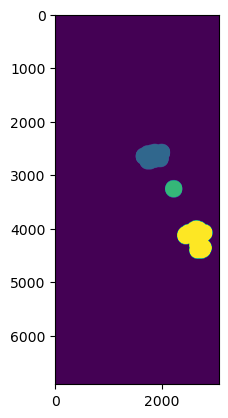

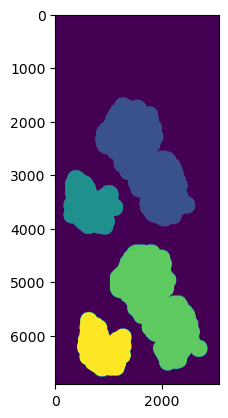

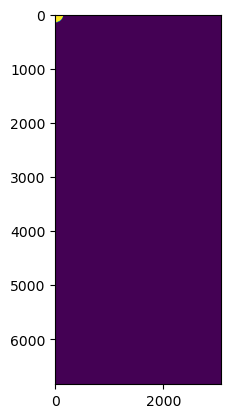

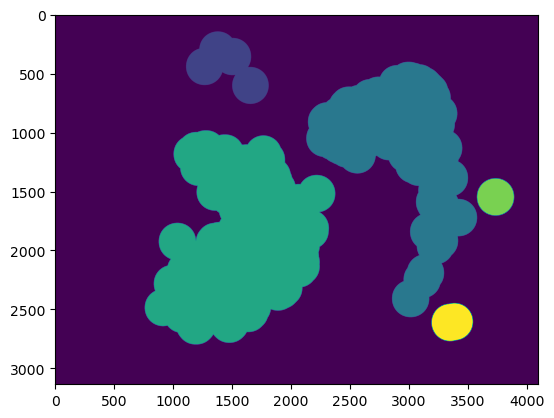

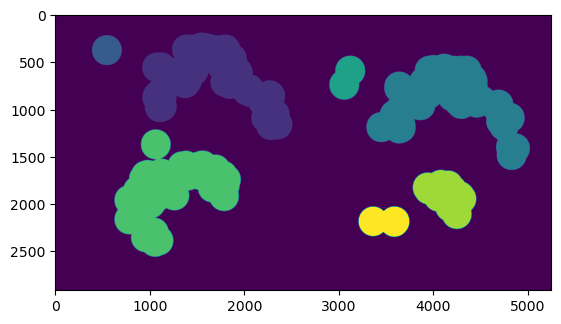

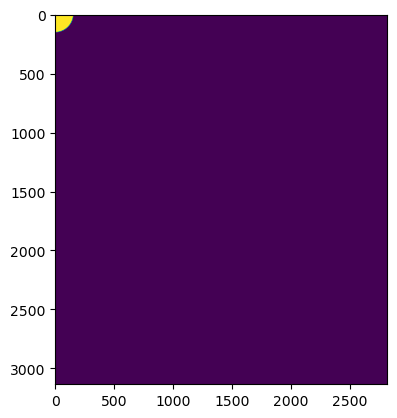

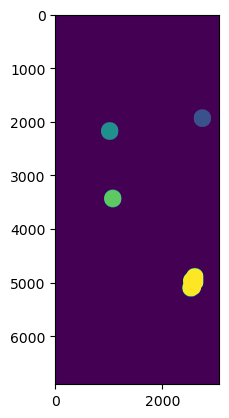

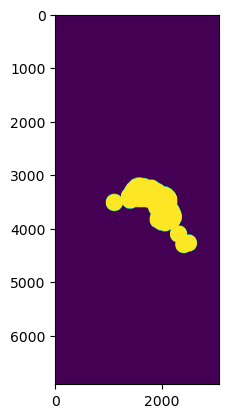

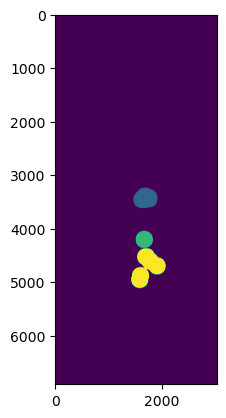

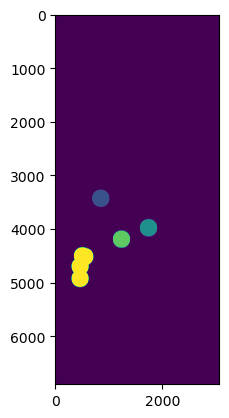

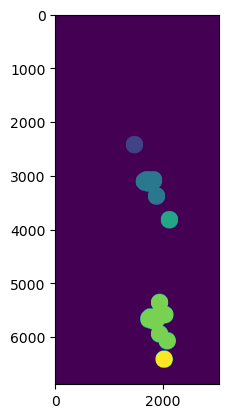

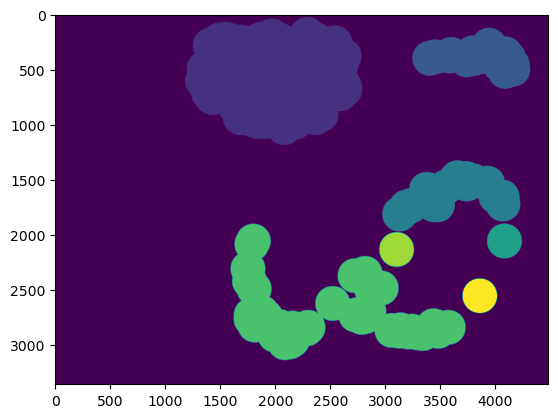

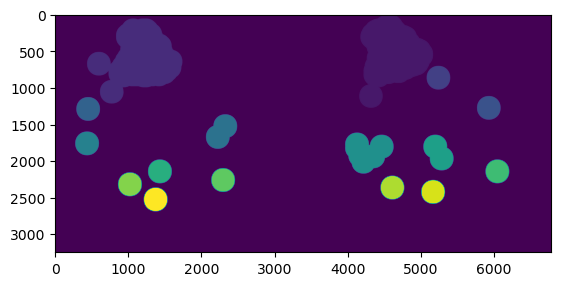

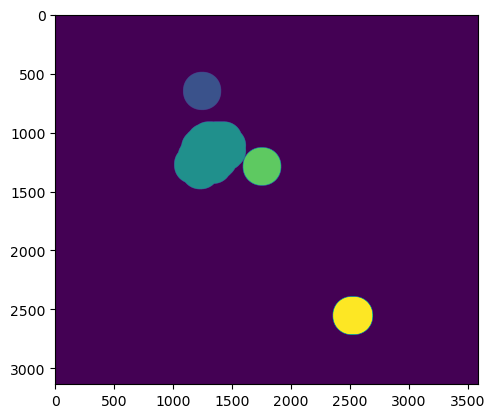

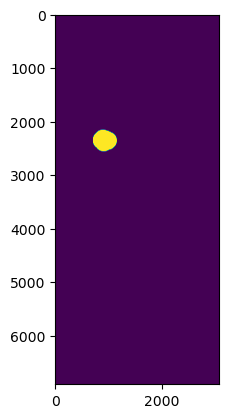

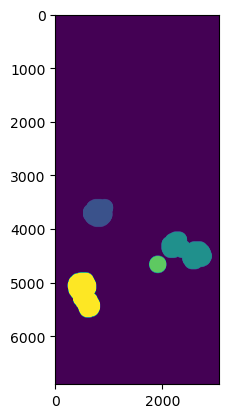

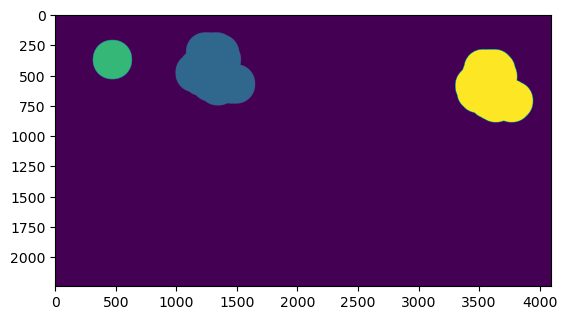

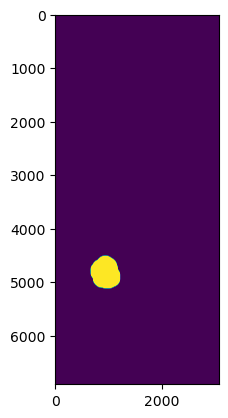

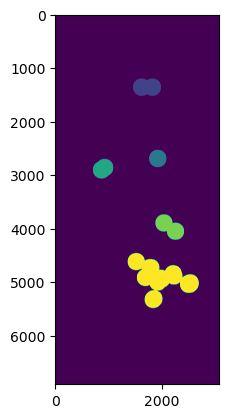

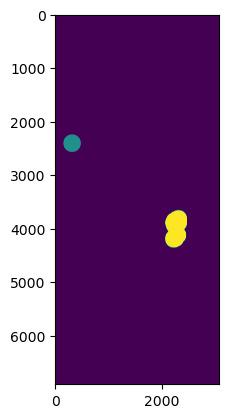

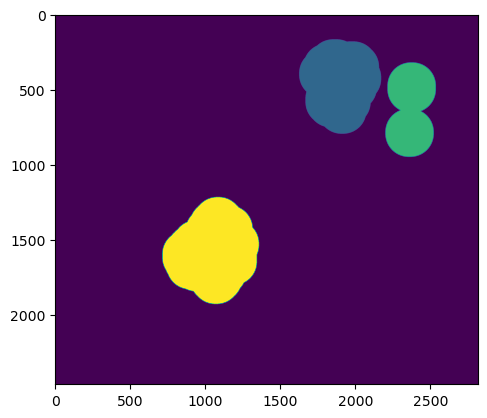

KeyboardInterrupt: 

In [6]:
import openslide
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as nd
from skimage import measure
import os
import sys
from PIL import Image

   
def expand(mask, resolution, level):
    """Computes the evaluation mask.
    
    Args:
        mask:    the file
        resolution: Pixel resolution of the image at level 0
        level:      The level at which the evaluation mask is made
        
    Returns:
        evaluation_mask
    """
    pixelarray = Image.open(mask)
    rgbimg = Image.new("RGBA", pixelarray.size)
    rgbimg.paste(pixelarray)
    pixelarray = np.array(rgbimg)
    distance = nd.distance_transform_edt(255 - pixelarray[:,:,0])
    Threshold = 75/(resolution * pow(2, level) * 2) # 75µm is the equivalent size of 5 tumor cells
    binary = distance < Threshold
    filled_image = nd.morphology.binary_fill_holes(binary)
    evaluation_mask = measure.label(filled_image, connectivity = 2) 
    return evaluation_mask

Image.MAX_IMAGE_PIXELS=None

path = "/data1/ian/C16_training_small/mask_v2"
store_path = "/data3/ian/dsmil-wsi/dsmil-wsi/test-c16/output"
files = os.listdir(path)
MASK_LEVEL = 0
L0_RESOLUTION = 0.243
for f in files:
    file = os.path.join(path,f)
    
    expand_img = expand(file, L0_RESOLUTION, MASK_LEVEL) 
    plt.imshow(expand_img)
    plt.show()
    store_file = os.path.join(store_path,f)
    #img.save(store_file)
    



/tmp/ipykernel_47336/3232043430.py:29: DeprecationWarning: Please use `binary_fill_holes` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  filled_image = nd.morphology.binary_fill_holes(binary)


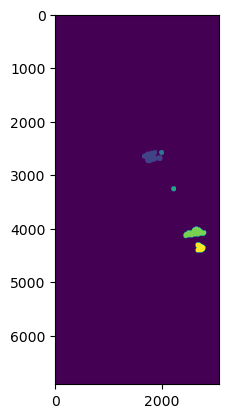

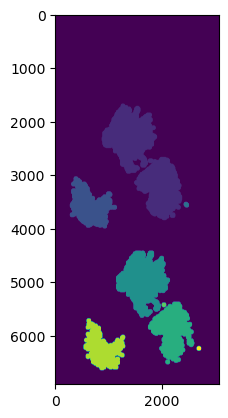

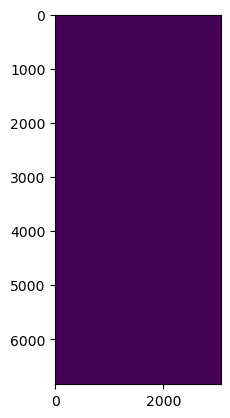

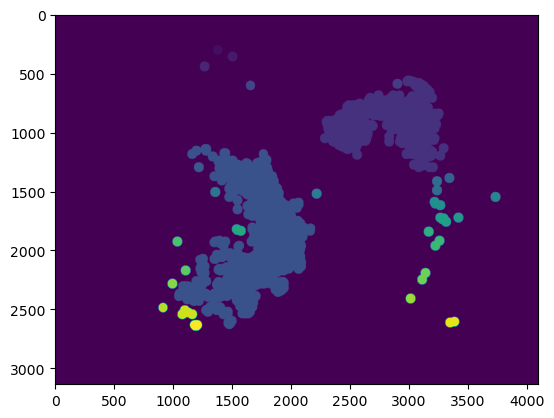

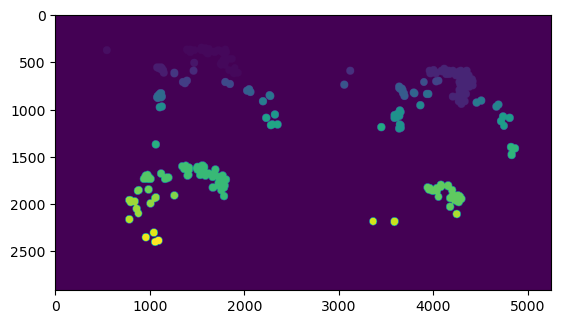

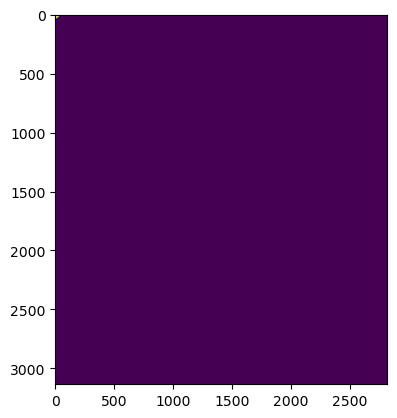

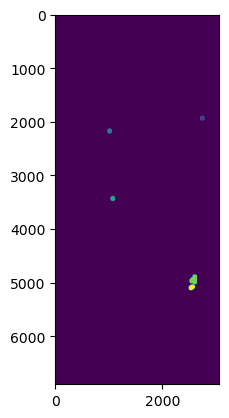

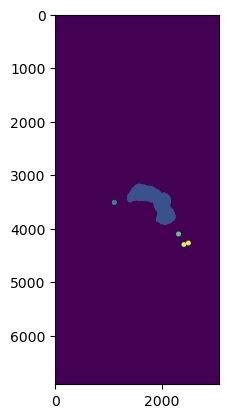

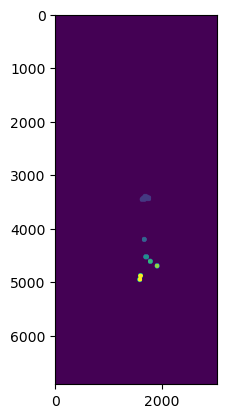

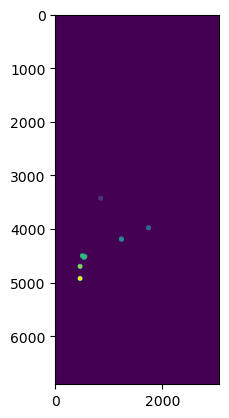

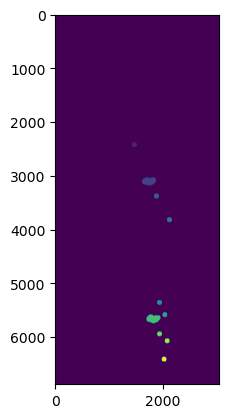

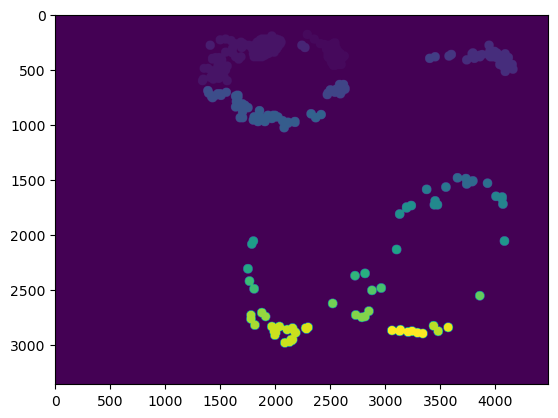

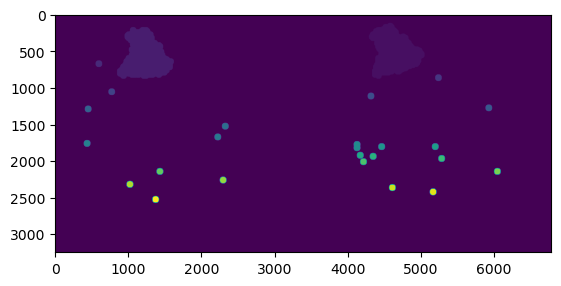

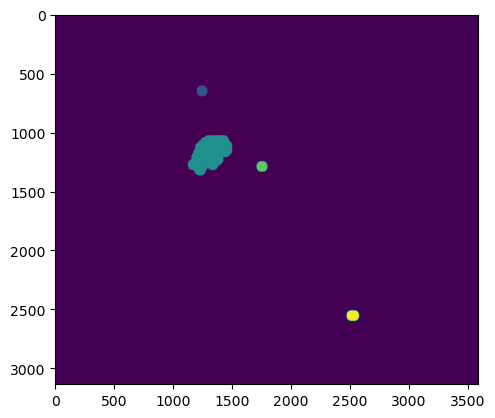

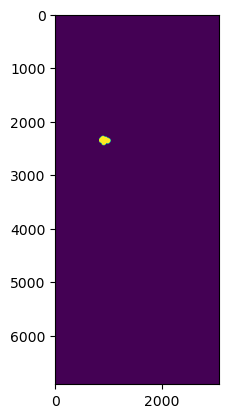

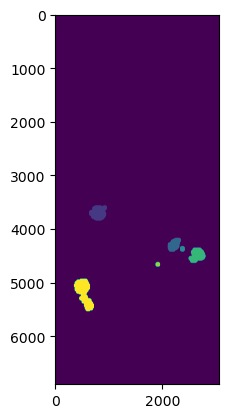

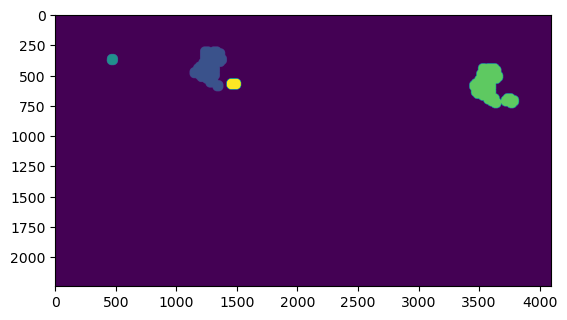

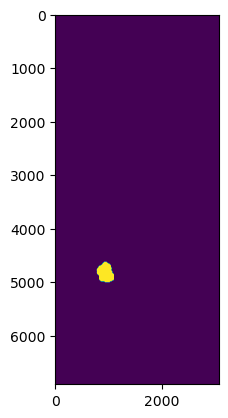

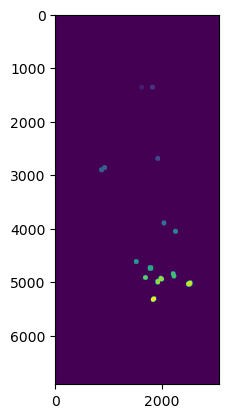

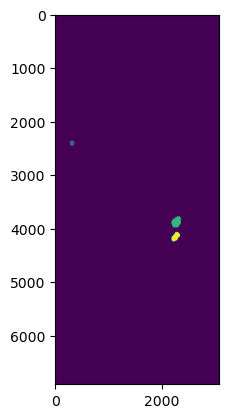

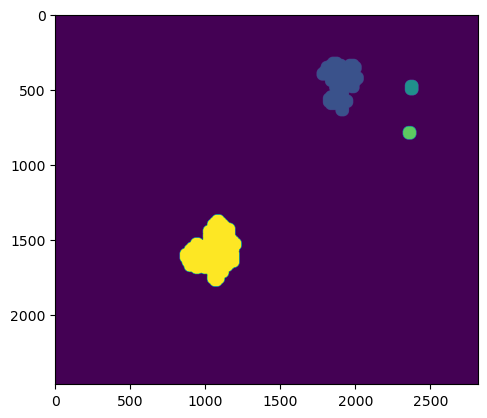

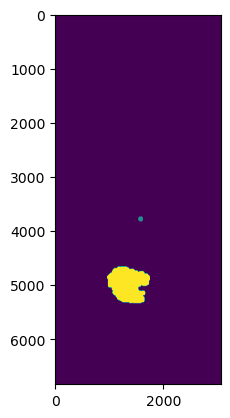

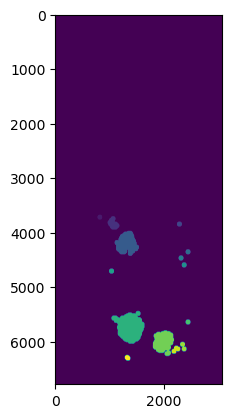

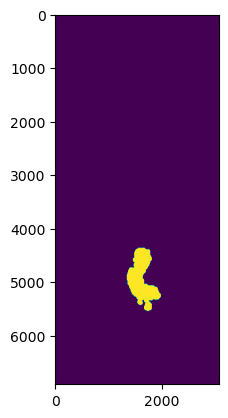

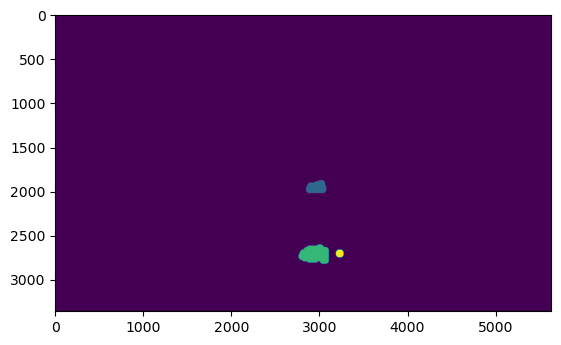

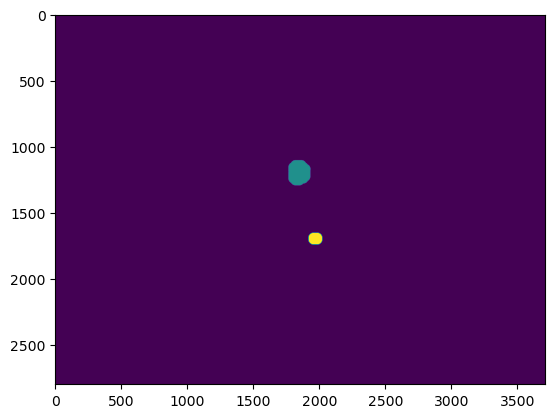

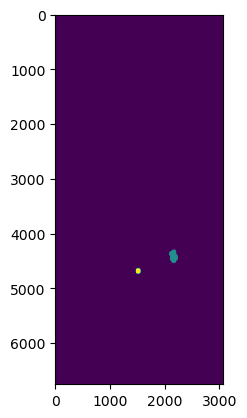

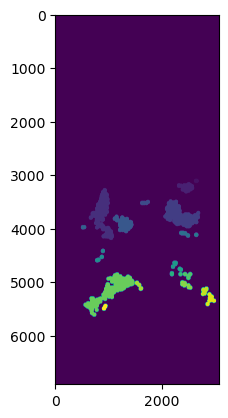

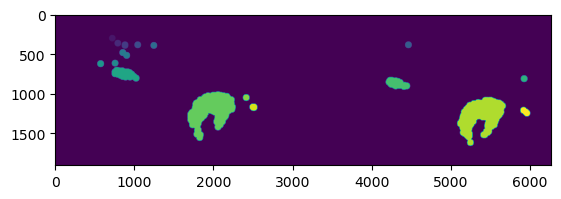

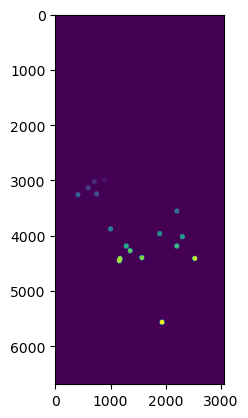

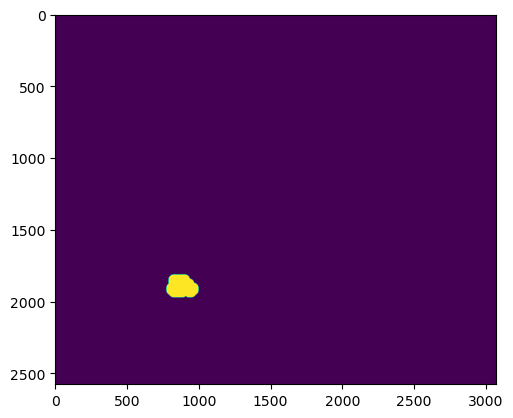

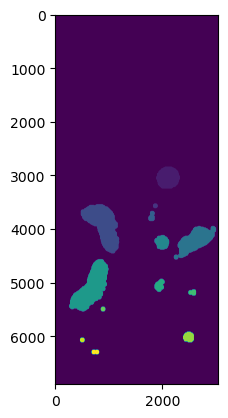

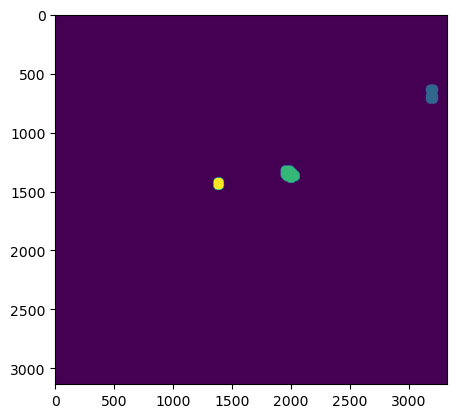

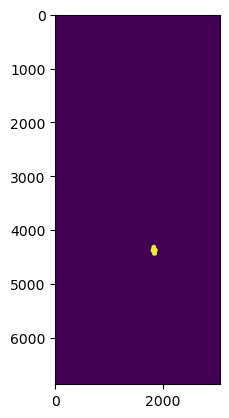

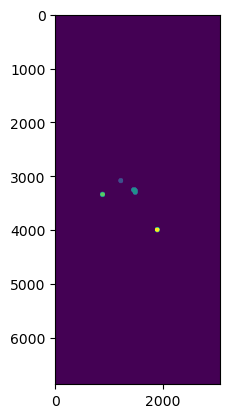

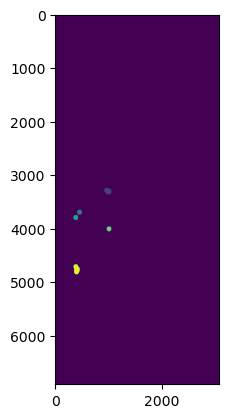

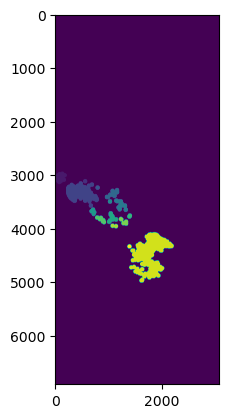

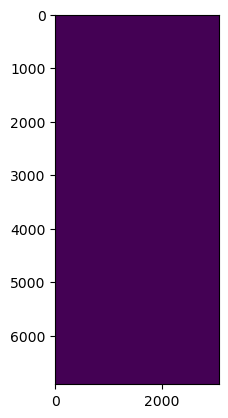

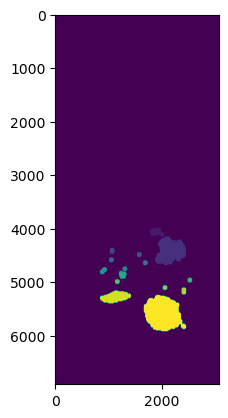

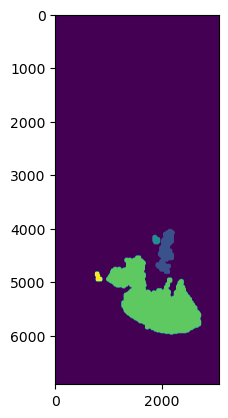

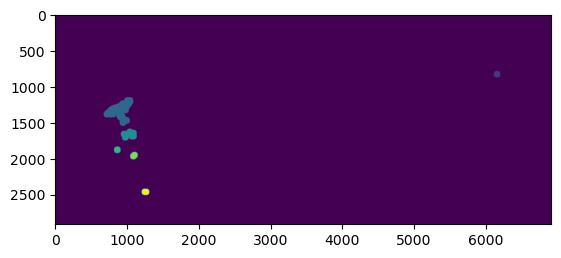

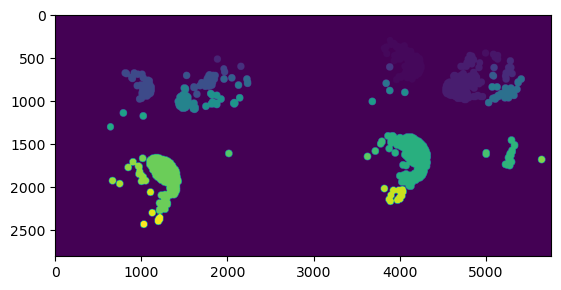

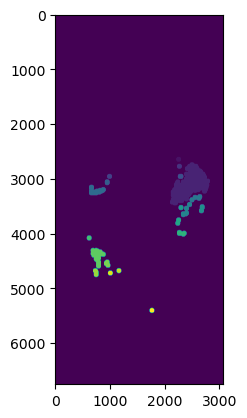

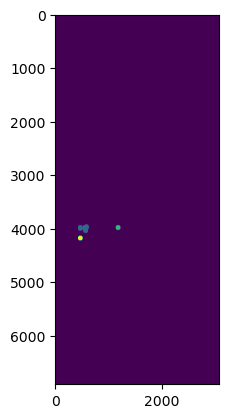

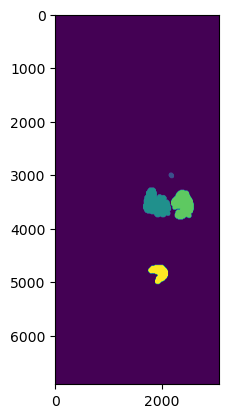

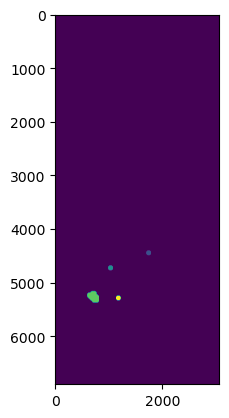

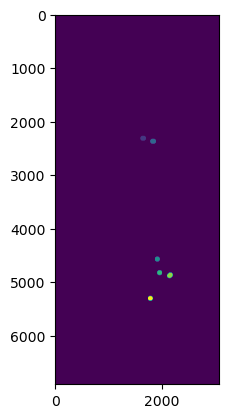

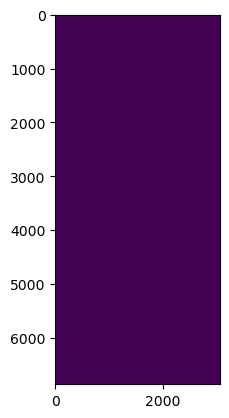

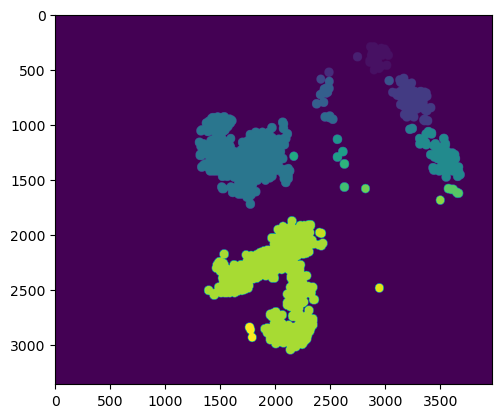

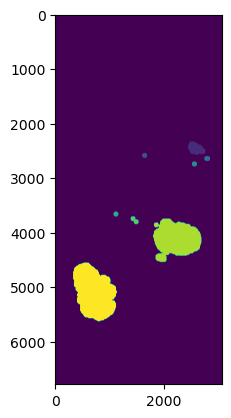

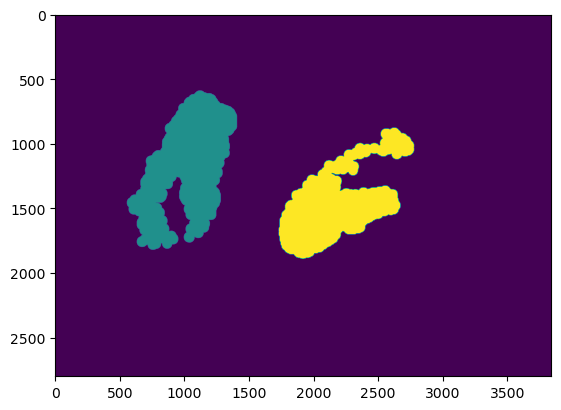

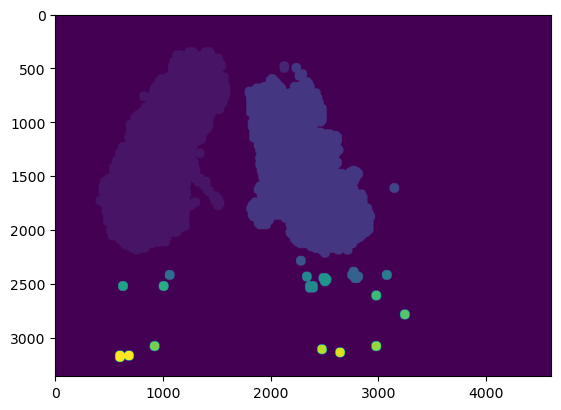

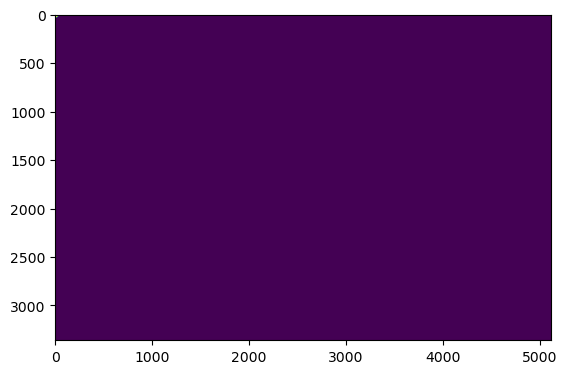

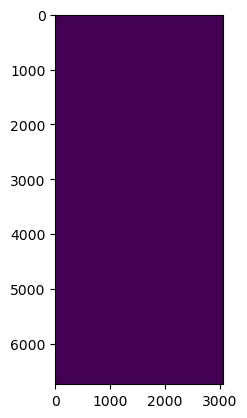

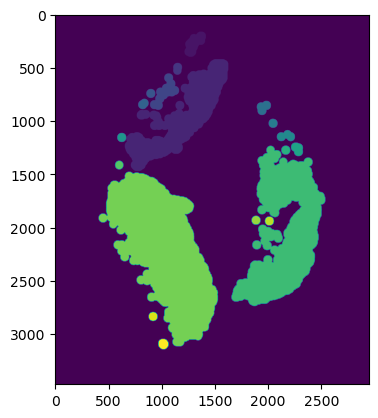

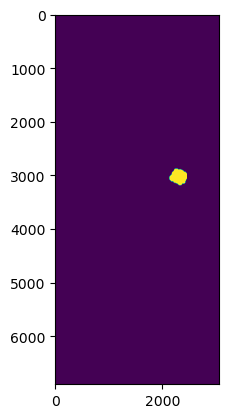

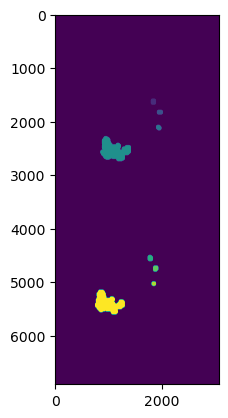

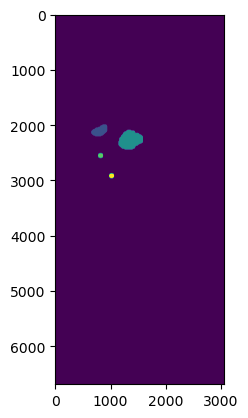

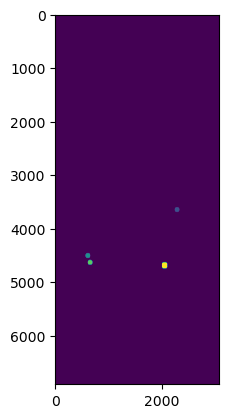

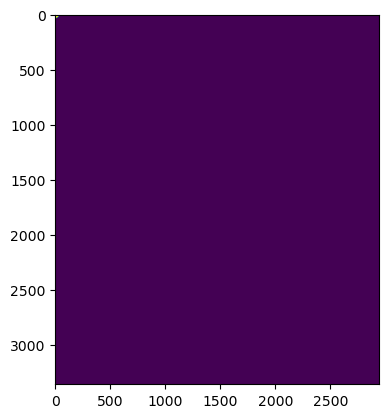

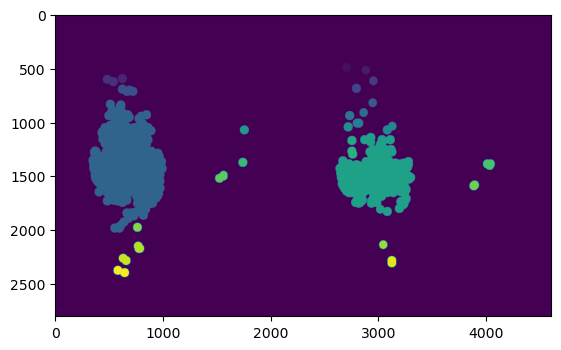

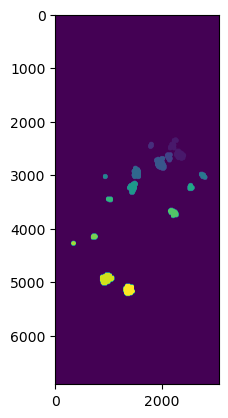

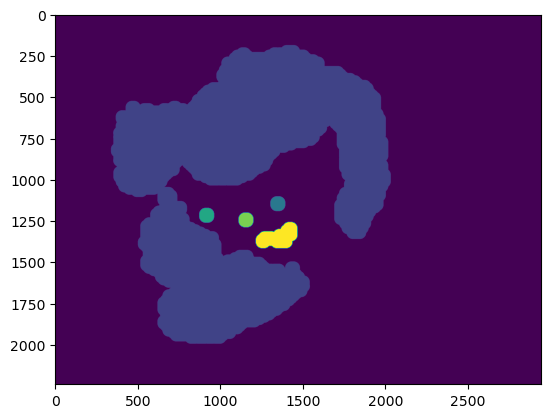

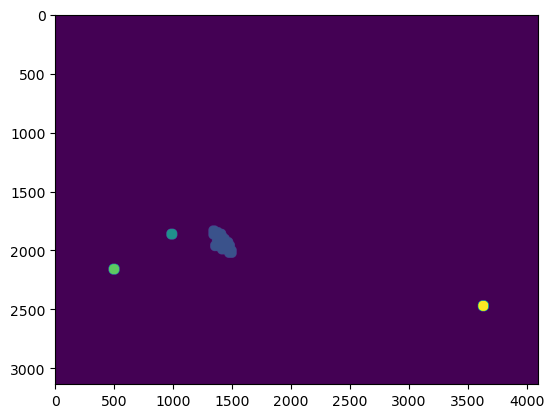

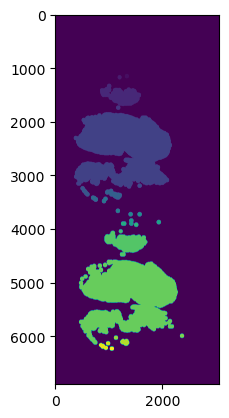

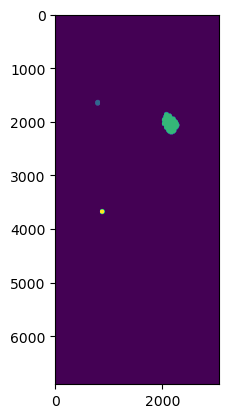

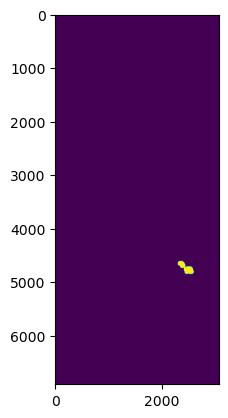

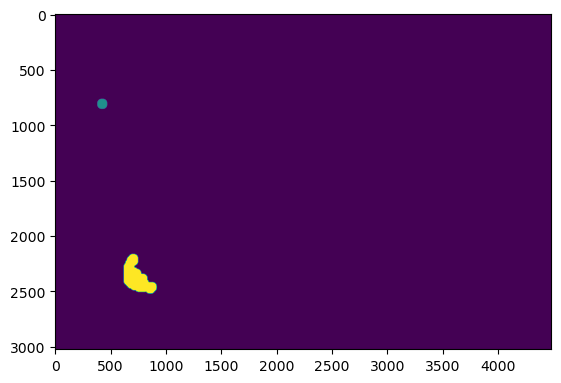

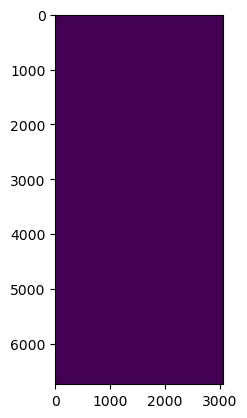

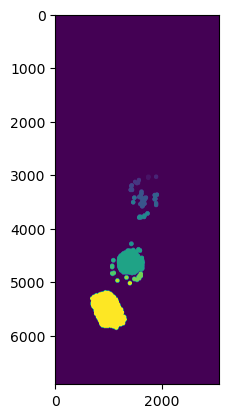

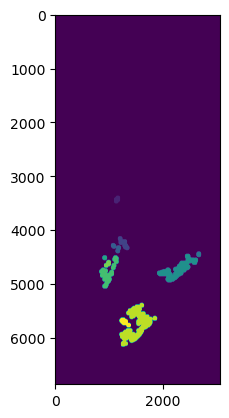

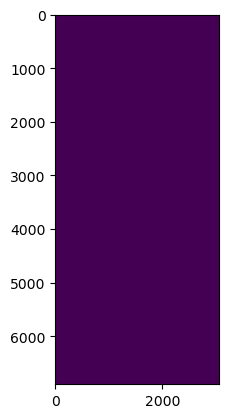

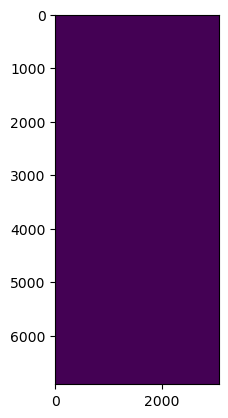

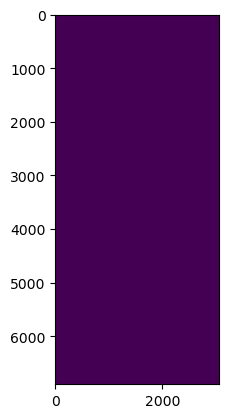

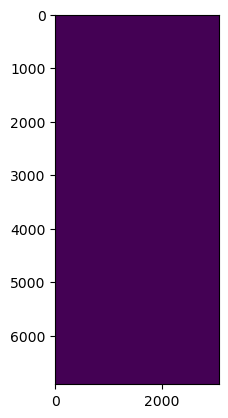

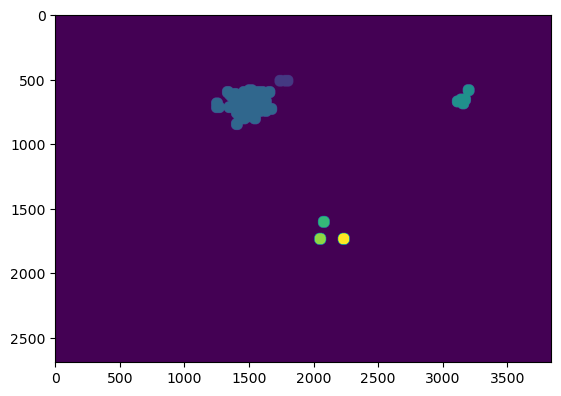

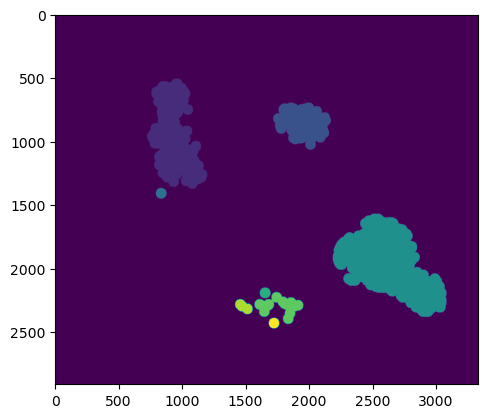

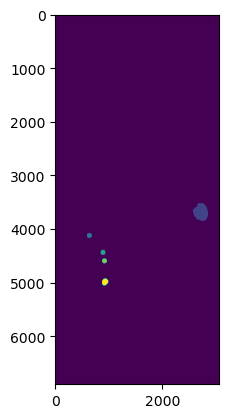

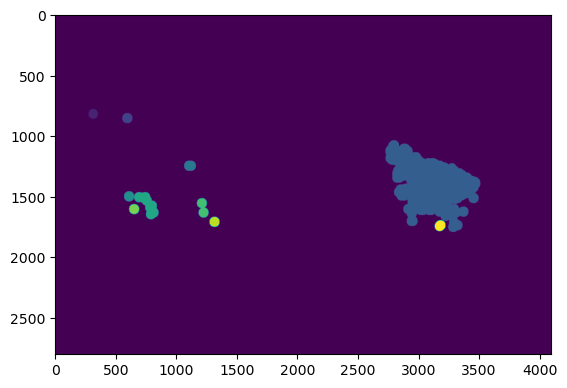

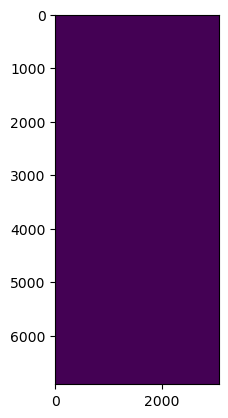

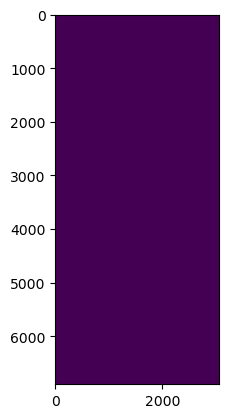

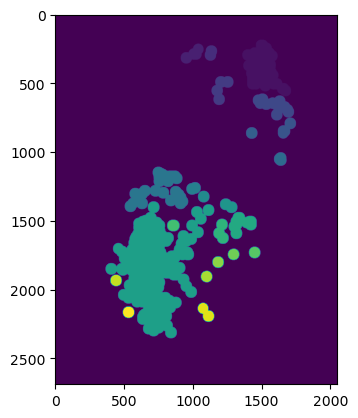

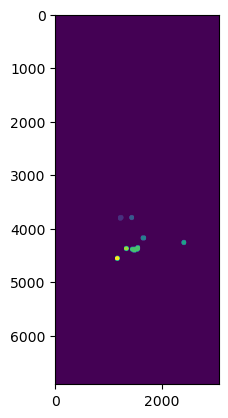

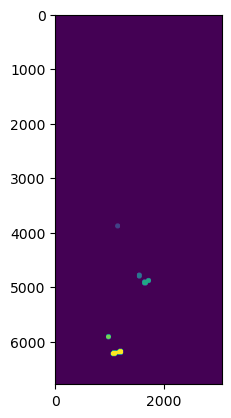

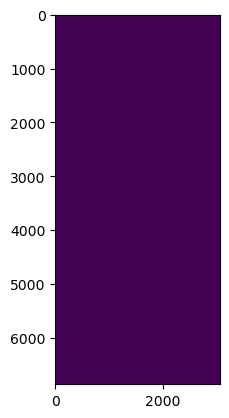

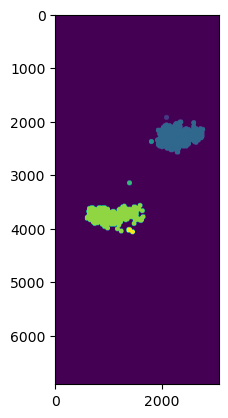

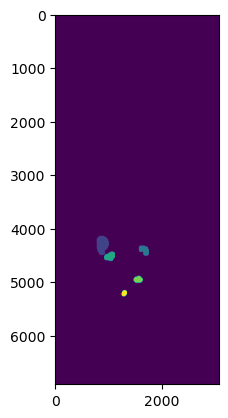

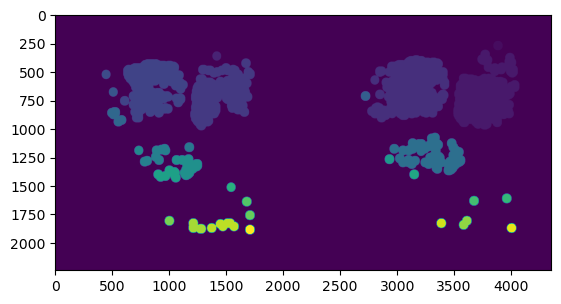

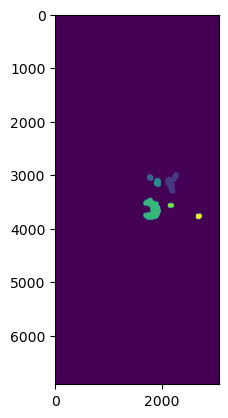

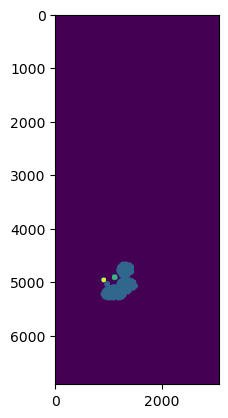

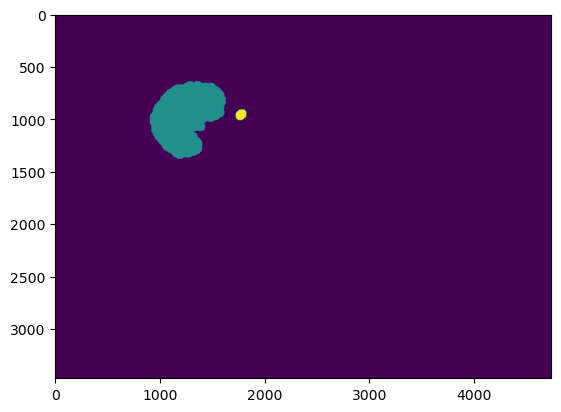

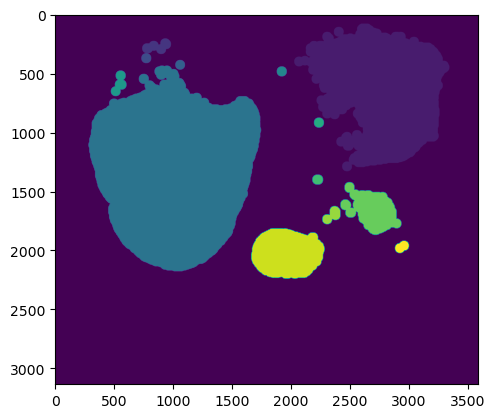

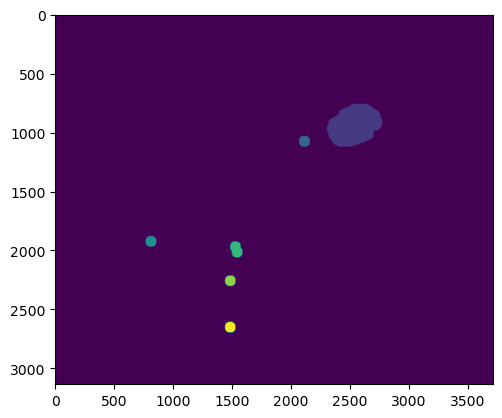

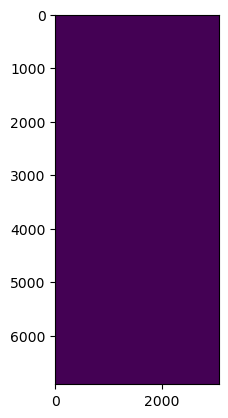

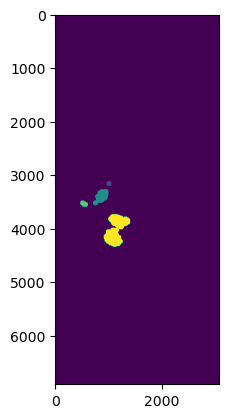

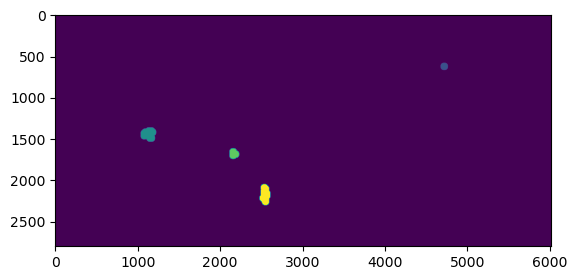

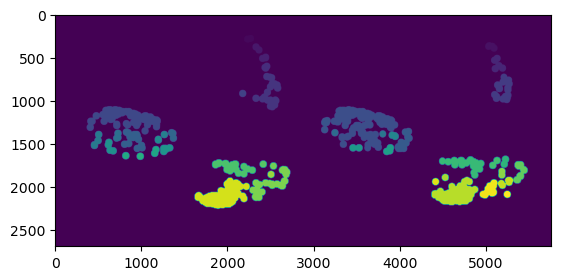

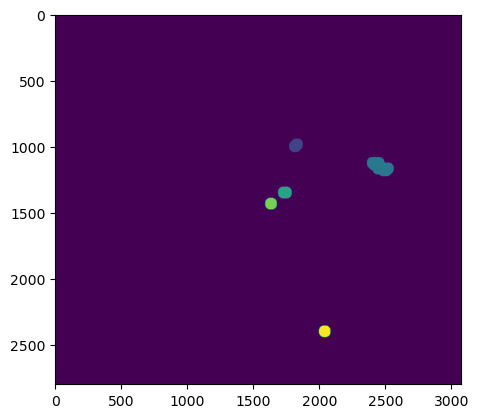

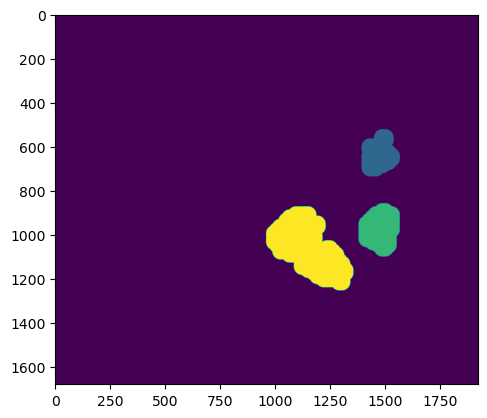

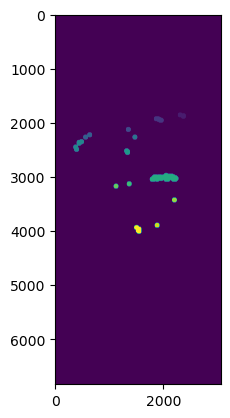

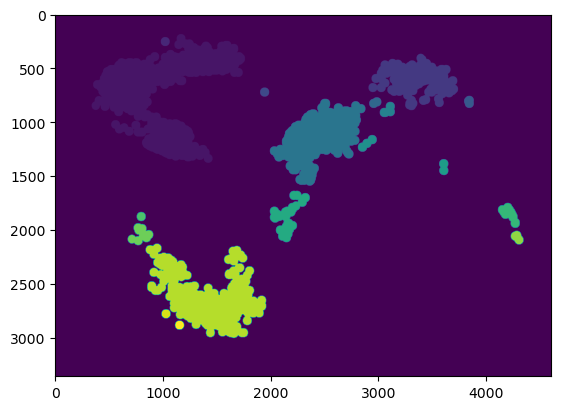

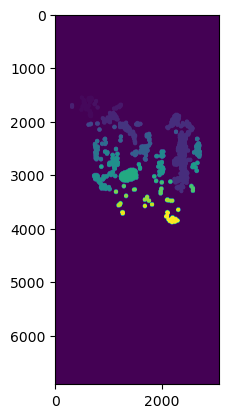

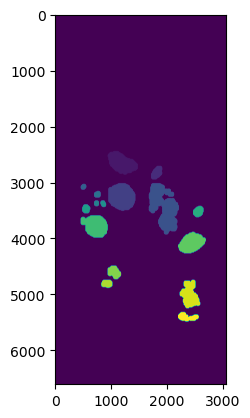

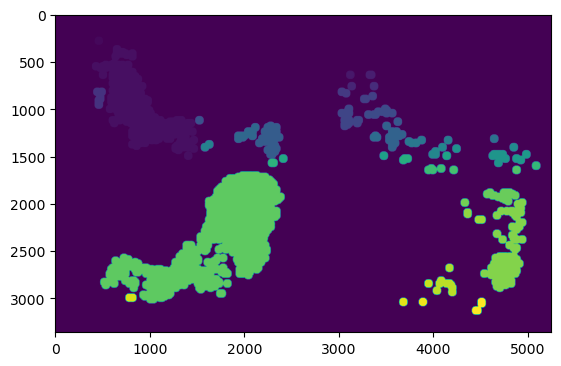

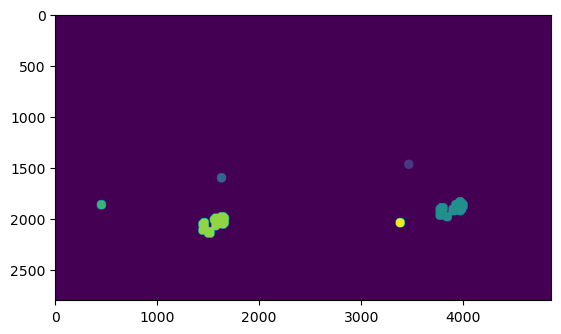

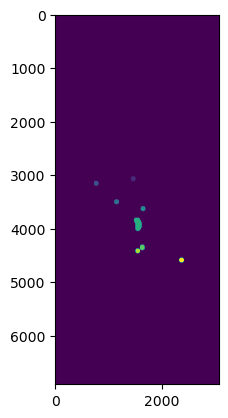

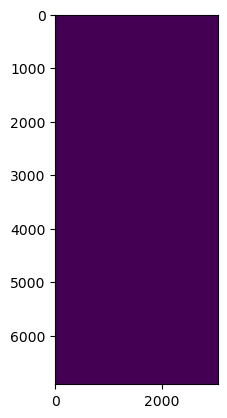

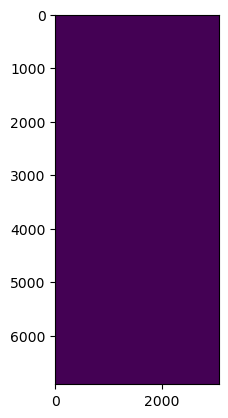

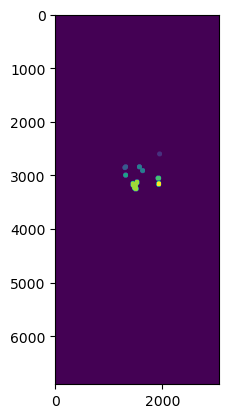

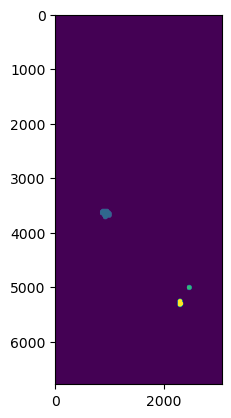

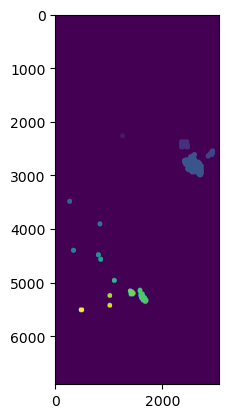

In [7]:
Image.MAX_IMAGE_PIXELS=None

path = "/data1/ian/C16_training_small/mask_v2"
store_path = "/data3/ian/dsmil-wsi/dsmil-wsi/test-c16/output"
files = os.listdir(path)
MASK_LEVEL = 2
L0_RESOLUTION = 0.243
for f in files:
    file = os.path.join(path,f)
    
    expand_img = expand(file, L0_RESOLUTION, MASK_LEVEL) 
    plt.imshow(expand_img)
    plt.show()
    store_file = os.path.join(store_path,f)
    #img.save(store_file)
    
